### 1.1 Linear Regression

**1.1.1. (a) 
For each of the polynomial bases of dimension k = 1,2,3,4, fit the data set of Figure 1
{(1, 3), (2, 2), (3, 0), (4, 5)} and superimpose their plots:**<br>

**The matrix form of the least squares solution (as given in slide#31 of week 1 slides):<br><br>**

$\textbf{w} = (\textbf{X}^\textbf{T}\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

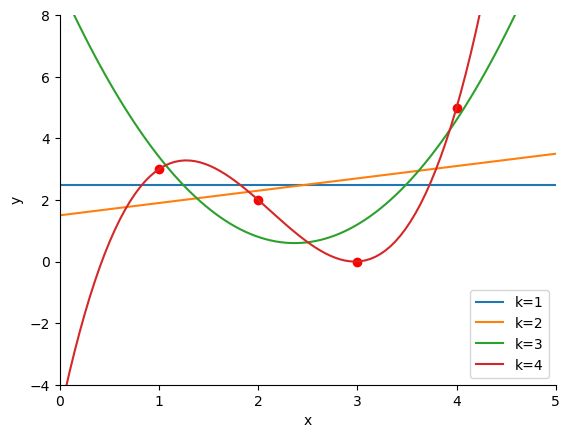

In [84]:
import numpy as np
import python_functions as py_func

dataset_x, dataset_y = [1, 2, 3, 4], [3, 2, 0, 5]
X_k1_k2_k3_k4 = py_func.transform_dataset_by_polynom_basis_k1_to_k4(dataset_x)
weights_k1_k2_k3_k4 = py_func.compute_weights_of_lr_by_least_sqrs(X_k1_k2_k3_k4, y=np.array(dataset_y).reshape(-1, 1))
x_for_pred_and_plot = np.linspace(0, 5, 100)
y_preds = py_func.predict_with_polynom_func(weights_k1_k2_k3_k4, x_for_pred = x_for_pred_and_plot)
py_func.plot_polynoms_k1_k2_k3_k4(x=dataset_x, y=dataset_y, y_preds=y_preds, x_for_plot=x_for_pred_and_plot)

**1.1.1. (b) Give the equations corresponding to the curves fitted for k = 1, 2, 3.** <br>

**Using the `weights_k1_k2_k3_k4` variable calculated in part (a), the equation is based on:**<br>

$y = w_0x^0 + w_1x^1 + ... +  w_{k-1}x^{k-1}$

In [34]:
print(f'k1_x0 = {float(weights_k1_k2_k3_k4[0][0])}')
print(f'k2_x0 = {float(weights_k1_k2_k3_k4[1][0])}, k2_x1 = {float(weights_k1_k2_k3_k4[1][1])}')
print(f'k3_x0 = {float(weights_k1_k2_k3_k4[2][0])}, k3_x1 = {float(weights_k1_k2_k3_k4[2][1])}, k3_x1 = {float(weights_k1_k2_k3_k4[2][2])}')

k1_x0 = 2.5
k2_x0 = 1.5, k2_x1 = 0.3999999999999998
k3_x0 = 9.000000000000012, k3_x1 = -7.100000000000011, k3_x1 = 1.500000000000001


**Hence, the equation for** $k=1$ is $y = 2.5$, <br>

**the equation for** $k=2$ is $y = 1.5 + 0.4x$, <br>

**the equation for** $k=3$ is $y = 9 - 7.1x + 1.5x^2$.

**1.1.1. (c) Calculate mean squared error (MSE).** <br> 

**(From slide#27 in week 1 slides): the empirical MSE of the linear predictor:** $\hat{y}=\textbf{w}.\textbf{x}$ **on a data sequence** $\textit{S}$ **is, in matrix notation, given by the mean of the least squares, which in matrix form is**:<br>

$\frac{1}{m}(X\textbf{w} - \textbf{y})^\intercal X\textbf{w} - \textbf{y}$ <br>

**There are 4 data samples, so** $m = 4$.

In [35]:
MSEs = py_func.calculate_MSEs(m=len(dataset_x),X=X_k1_k2_k3_k4, w=weights_k1_k2_k3_k4, y=dataset_y)
for i, MSE in zip([0, 1, 2, 3], MSEs):
    print(f'k={i + 1} MSE = {MSE}')

k=1 MSE = 3.25
k=2 MSE = 3.05
k=3 MSE = 0.8000000000000008
k=4 MSE = 9.883638281514057e-27


**1.1.2. (a) i. Generate dataset using:** $g_{\sigma}(x) := \sin^2{(2 \pi x)} + \epsilon$ **and superimpose with a plot of the same function without** $\epsilon$ **(noise) added.**

**1.1.2. (a) ii. Fit dataset to polynomial bases k=2, 5, 10, 14 and 18.** <br>

**Superimpose their plots to (maybe) observe overfitting with increasing number of dimensions:**

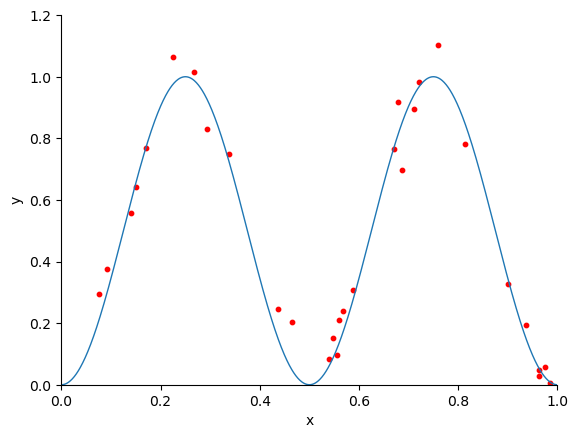

In [4]:
g_dataset_30x, g_dataset_30y = py_func.generate_dataset_about_g(num_of_data_pairs=30)
py_func.plot_g_0p07_and_sin_sqrd_2pi_x(x=g_dataset_30x, y=g_dataset_30y, x_for_plot=np.linspace(0, 1, 1000))

<class 'numpy.ndarray'>


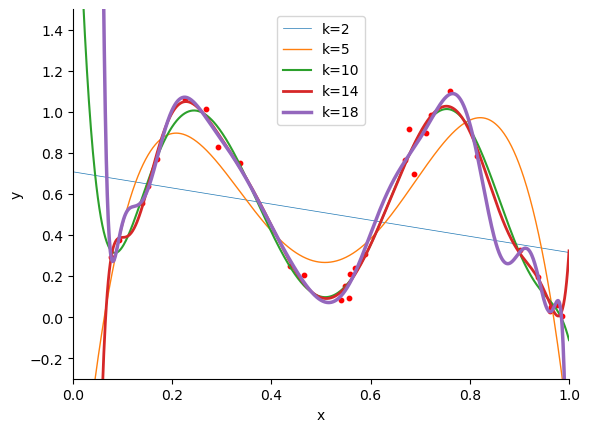

In [15]:
X_k18_30 = py_func.transform_dataset_by_polynom_basis_k18(x=g_dataset_30x)
weights_k2_k5_k10_k14_k18 = py_func.compute_weights_of_lr_by_least_sqrs([X_k18_30[:,:2], X_k18_30[:,:5],
                                                                    X_k18_30[:,:10],X_k18_30[:,:14],
                                                                    X_k18_30], g_dataset_30y)
x_for_pred_and_plot = np.linspace(0, 1, 1000)
y_preds = py_func.predict_with_polynom_func(weights_k2_k5_k10_k14_k18, x_for_pred = x_for_pred_and_plot)
py_func.plot_polynom_k2_k5_k10_k14_k18(x=g_dataset_30x, y=g_dataset_30y, y_preds=y_preds, x_for_plot = x_for_pred_and_plot)

**1.1.2. (b) Calculate training set error of dataset S  $te_k(S)$ and plot its natural log against k to observe reduction in training error with increasing dimensions.**

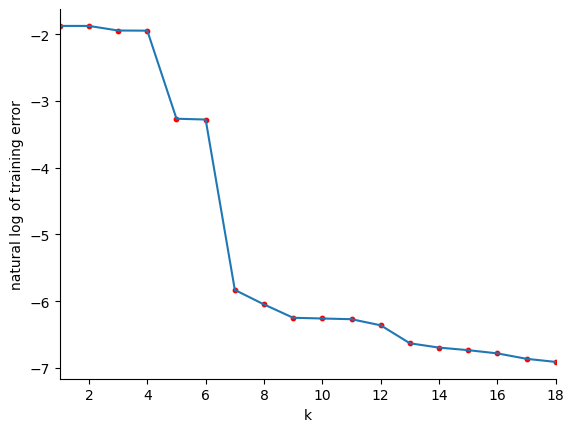

In [6]:
# weights_k1_to_k18 will be used for making predictions in test set.
weights_k1_to_k18, training_errors_k1_to_k18 = py_func.compute_training_errors_polynom()
py_func.plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(training_errors_k1_to_k18))

**1.1.2. (c) Calculate test set error of (larger) dataset T  $tse_k(T)$ using model weights from linear regression of training dataset.** <br>

**Plot its natural log against k to observe how with increasing dimensions (leading to overfiting), the model is essentially starting to fit the noise.**

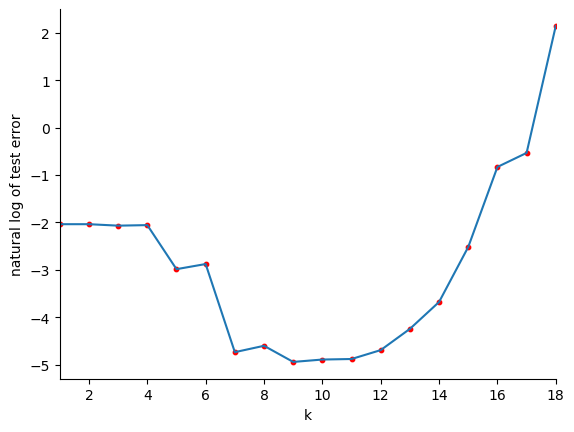

In [7]:
py_func.plot_log_error_vs_k(k=list(range(1, 19)),
                            log_error=np.log(py_func.compute_test_errors_polynom(w=weights_k1_to_k18)), train_or_test='test')
# NOTE: POSSIBLE CHANGE IN Y-AXIS RANGE

**1.1.2. (d) Repeat parts (b) and (c) but average over 100 epochs.**

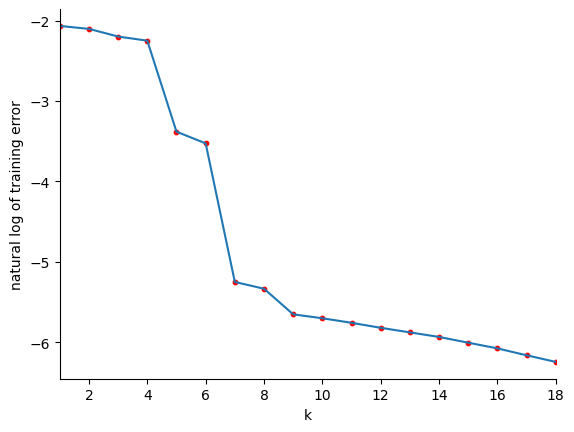

In [8]:
training_errors_k1_to_k18_list = py_func.run_training_polynom_100_times()
py_func.plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(np.mean(training_errors_k1_to_k18_list, axis=0)))

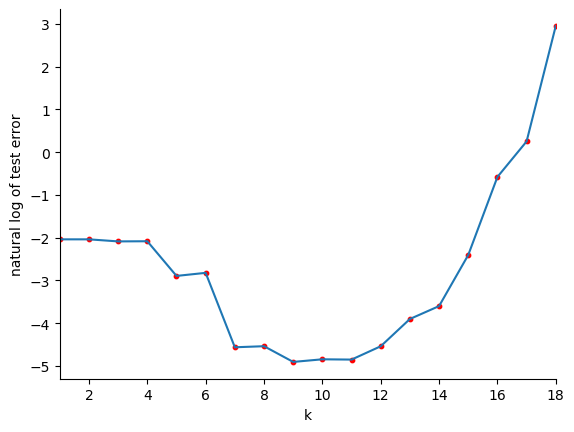

In [9]:
test_errors_k1_to_k18_list = py_func.run_test_polynom_100_times(w=weights_k1_to_k18)
py_func.plot_log_error_vs_k(k=list(range(1, 19)),
                    log_error=np.log(np.mean(test_errors_k1_to_k18_list, axis=0)), train_or_test='test')

**1.1.3. Repeat 2 (b)-(d) but use basis** (for $k=1, ..., 18$): $ \{\sin(1\pi x), \sin(2\pi x)\, \sin(3\pi x), ..., \sin(k\pi x)\} $

**Hence, calculate training errors and plot against k, calculate test errors and plot against k, and repeat but with average of 100 epochs.**

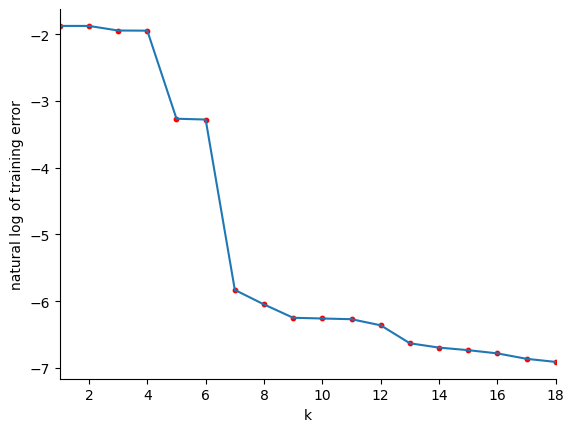

In [10]:
weights_k1_to_k18, py_func.training_errors_k1_to_k18 = py_func.compute_training_errors_sine()
py_func.plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(training_errors_k1_to_k18))

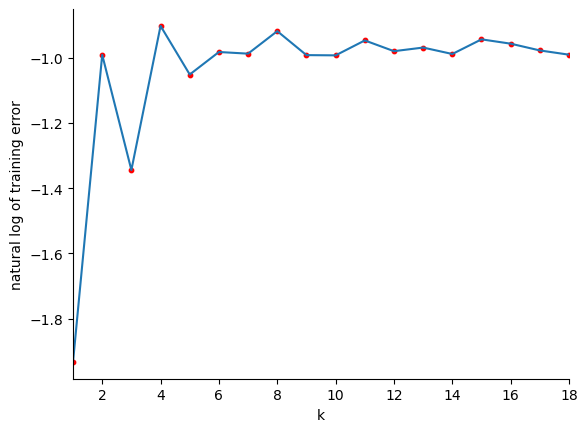

In [11]:
test_errors_k1_to_k18 = py_func.compute_test_errors_sine(w=weights_k1_to_k18)
py_func.plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(test_errors_k1_to_k18))

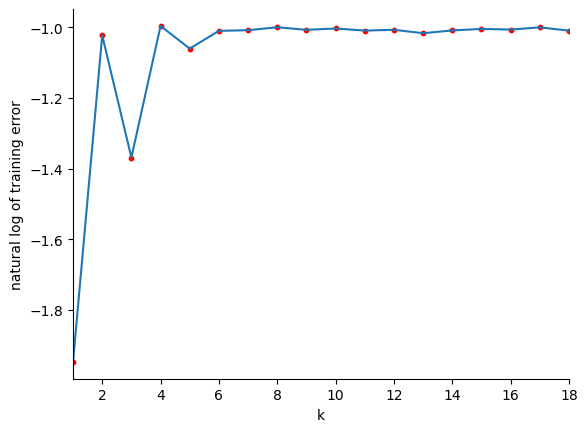

In [12]:
training_errors_k1_to_k18_list = py_func.run_training_sine_100_times()
py_func.plot_log_error_vs_k(k=list(range(1, 19)), log_error=np.log(np.mean(training_errors_k1_to_k18_list, axis=0)))

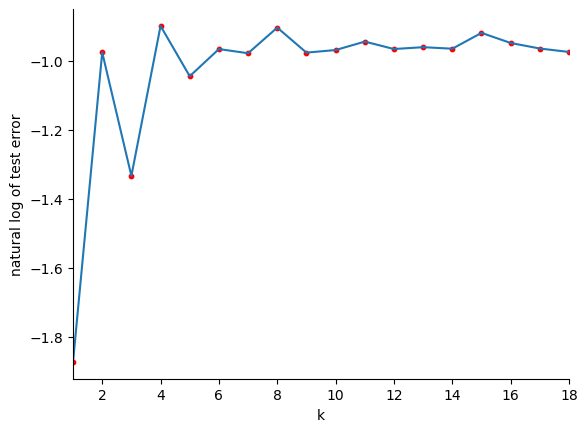

In [13]:
test_errors_k1_to_k18_list = py_func.run_test_sine_100_times(w=weights_k1_to_k18)
py_func.plot_log_error_vs_k(k=list(range(1, 19)),
                    log_error=np.log(np.mean(test_errors_k1_to_k18_list, axis=0)), train_or_test='test')